<a href="https://colab.research.google.com/github/meligurevich/IAAA1/blob/main/TP2_AA1_aprendizaje_no_supervisado_Gurevich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA1  - Aprendizaje no supervisado 📊

**MELISA SABRINA GUREVICH - DNI: 35.365.884**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de clustering y reducción de dimensionalidad**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#🎯 1. Selección del Dataset
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas.  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

Para este trabajo voy a utilizar un dataset sobre la ESTIMACIÓN DE NIVELES DE OBESIDAD BASADA EN HÁBITOS ALIMENTICIOS Y CONDICIÓN FÍSICA.

El link al dataset es:
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

# 📊 Descripción del dataset

Este conjunto de datos incluye información para la estimación de los niveles de obesidad en personas de los países de México, Perú y Colombia, basada en sus hábitos alimenticios y condición física. Los datos contienen 17 atributos y 2.111 registros. Los registros están etiquetados con la variable de clase NObesity (Nivel de Obesidad), lo que permite la clasificación de los datos utilizando los siguientes valores:
* Peso Insuficiente (Insufficient Weight)
* Peso Normal (Normal Weight)
* Sobrepeso Nivel I (Overweight Level I)
* Sobrepeso Nivel II (Overweight Level II)
* Obesidad Tipo I (Obesity Type I)
* Obesidad Tipo II (Obesity Type II)
* Obesidad Tipo III (Obesity Type III)

>Esta información se encuentra en el mismo link del dataset.

In [ ]:
# Cargamos las Librerías

import warnings
warnings.filterwarnings(action="ignore")

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.manifold import TSNE

In [ ]:
# Cargamos dataset
# Importamos desde Google Colab
from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/IAAAGUREVICH/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(ruta)

#Visualizamos las primeras muestras del dataset
df.head()

Mounted at /content/drive


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Visualizamos las columnas del dataset
print(df.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


# Descripción de las variables

🧑‍🤝‍🧑 Gender
Género del individuo.
Tipo de variable: Categórica nominal

🎂 Age
Edad en años.
Tipo de variable: **Numérica continua**

📏 Height
Altura en metros.
Tipo de variable: **Numérica continua**

⚖️ Weight
Peso en kilogramos.
Tipo de variable: **Numérica continua**

👨‍👩‍👧‍👦 family_history_with_overweight
¿Tiene antecedentes familiares de sobrepeso? (yes/no)
Tipo de variable: Categórica binaria

🍔 FAVC
¿Consume frecuentemente alimentos altos en calorías? (yes/no)
Tipo de variable: Categórica binaria

🥦 FCVC
Frecuencia con la que consume vegetales (escala numérica: 0–3).
Tipo de variable: Numérica ordinal

🍽️ NCP
Número de comidas principales al día.
Tipo de variable: Numérica discreta

🍫 CAEC
Consumo de alimentos entre comidas (never, sometimes, frequently, always).
 Tipo de variable: Categórica ordinal

🚬 SMOKE
¿Fuma? (yes/no)
Tipo de variable: Categórica binaria

💧 CH2O
Cantidad de agua consumida al día (valor aproximado en litros).
Tipo de variable: **Numérica continua**

📊 SCC
¿Monitorea su ingesta calórica? (yes/no)
Tipo de variable: Categórica binaria

🏃 FAF
Frecuencia de actividad física semanal (valor numérico).
Tipo de variable: **Numérica continua**

📱 TUE
Tiempo de uso diario de dispositivos tecnológicos (valor numérico).
Tipo de variable: **Numérica continua**

🍷 CALC
Frecuencia de consumo de alcohol (categoría: no, sometimes, frequently).
Tipo de variable: Categórica ordinal

🚗 MTRANS
Medio de transporte usado (car, bike, public transportation, walking, etc.). Tipo de variable: Categórica nominal

🩺 NObeyesdad
Nivel de obesidad (Insufficient Weight, Normal, Overweight I/II, Obesity I/II/III).
Tipo de variable: Categórica ordinal (Variable objetivo)

>En negrita se marcaron las variables numéricas contínuas.


## 🎯 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

# 📊 Descripción de las variables


In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

>El conjunto de datos está compuesto por 2111 filas y 17 columnas. Todas las columnas están completas, es decir, no presentan valores faltantes, por lo tanto no es necesario realizar ningún tipo de imputación.
Se identifican 8 columnas con datos numéricos y 9 con datos de tipo categórico.

In [ ]:
# Visualizamos los parámetros estadísticos del dataset
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


>Los valores de las variables son normales, pero algunas como el peso, la edad y la altura varían mucho entre el mínimo y el máximo. Esto puede indicar que hay datos muy distintos al resto, llamados outliers.

In [ ]:
# Seleccionamos las columnas numéricas y calculaamos la media
medias = df.select_dtypes(include=['int64', 'float64']).mean()

# Mostramos la media de cada columna
print("Media para cada columna numérica del dataset:\n")
for columna, valor in medias.items():
    print(f"{columna}: {valor:.2f}")

Media para cada columna numérica del dataset:

Age: 24.31
Height: 1.70
Weight: 86.59
FCVC: 2.42
NCP: 2.69
CH2O: 2.01
FAF: 1.01
TUE: 0.66


>El análisis muestra las medias de las columnas numéricas del dataset. Por ejemplo, la edad promedio es 24.31 años y el peso medio es 86.59 kg, mientras que los promedios de variables alimenticias como FCVC (2.42), NCP (2.69) y CH2O (2.01) indican tendencias de consumo moderadas.

#Visualización de las variables



Histogramas para ver las distribuciones

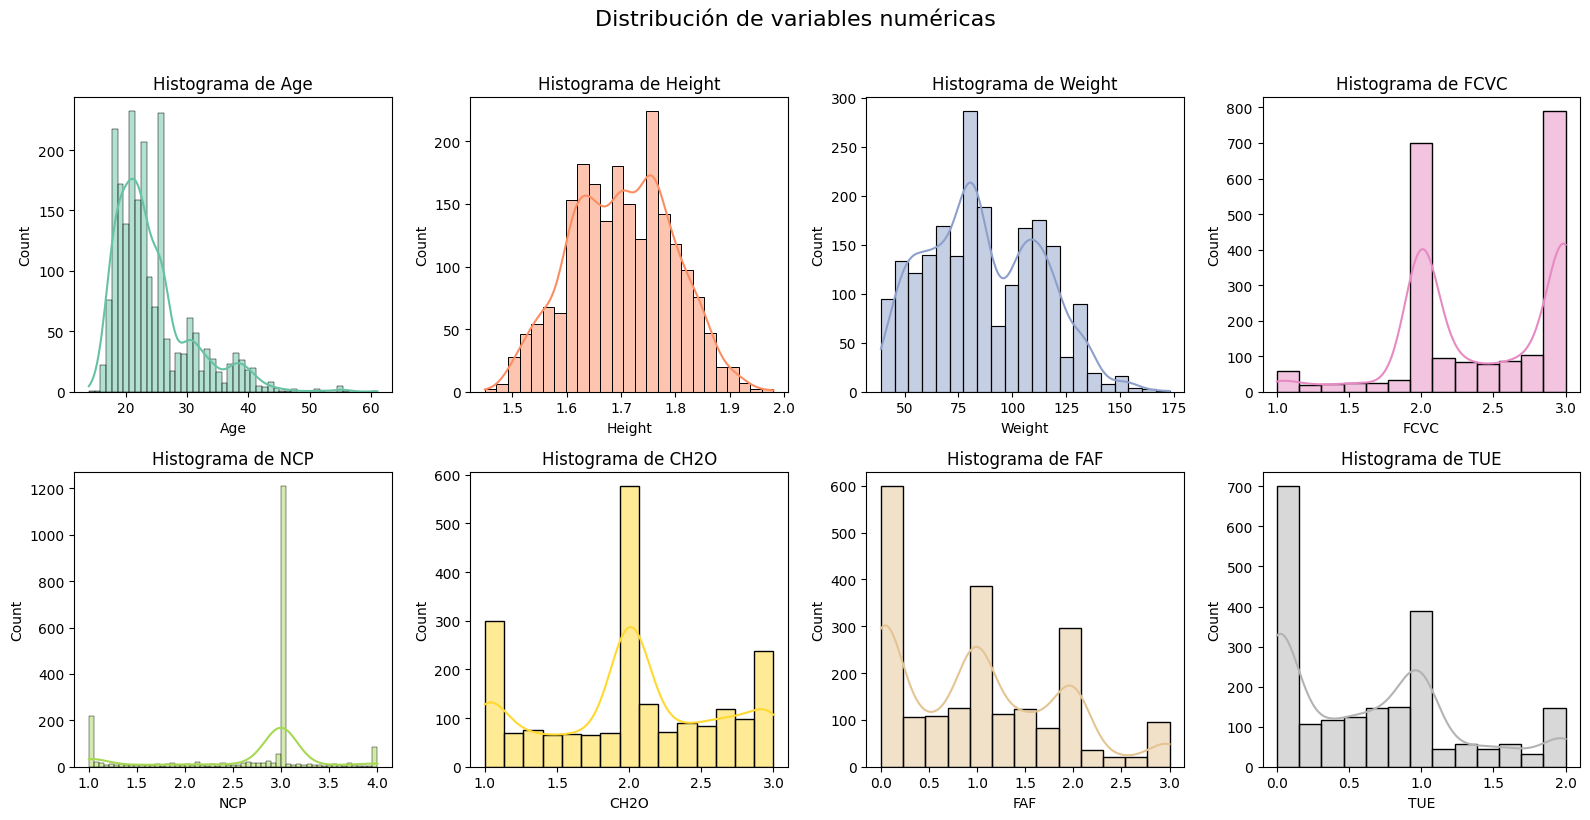

In [ ]:
# Variables numéricas
numeric_cols = df.select_dtypes(include='number').columns

# Tamaño de la grilla
n_cols = 4
n_rows = -(-len(numeric_cols) // n_cols)

# Creamos figura y ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Paleta de colores llamativos
colors = sns.color_palette("Set2", len(numeric_cols))

# Graficamos cada histograma
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Histograma de {col}', fontsize=12)
    axes[i].tick_params(axis='x', labelsize=10)

# Eliminamos ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle("Distribución de variables numéricas", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

**Observaciones:**
- Cuando los valores están concentrados en un rango bajo, como en Age o Weight, indica una distribución asimétrica hacia la derecha.
- Una forma de campana, como en Height, indica distribución normal.
- Valores repetidos como en NCP o CH2O muestran una distribución discreta o categorizada.
- Cuando muchos datos están cerca de 0 (como en FAF o TUE), hay una asimetría negativa, con sesgo hacia la izquierda.


Gráfico Boxplots para detectar los outliers

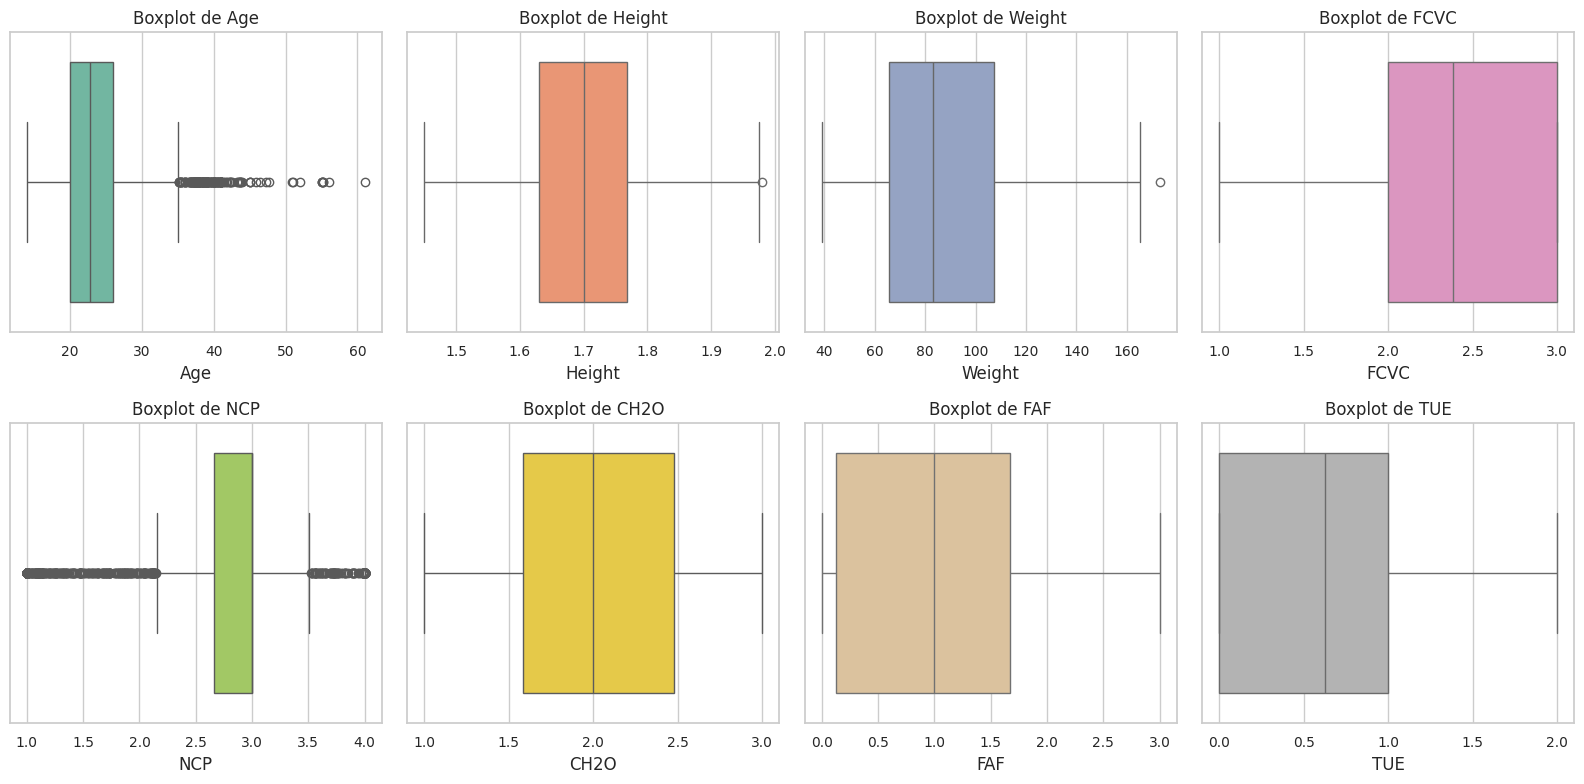

In [ ]:
# Estilo visual
sns.set(style="whitegrid", palette="muted")
colors = sns.color_palette("Set2", len(numeric_cols))

# Variables numéricas
numeric_cols = df.select_dtypes(include='number').columns

# Tamaño de la grilla
n_cols = 4
n_rows = -(-len(numeric_cols) // n_cols)  # Redondeo hacia arriba

# Creamos subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Gráficos boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color=colors[i])
    axes[i].set_title(f'Boxplot de {col}', fontsize=12)
    axes[i].tick_params(axis='x', labelsize=10)

# Eliminamos ejes sobrantes si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Observaciones**:
- Hay outliers en Age, Weight y NCP.
- Las variables como CH2O, FAF, TUE y FCVC muestran valores discretos y concentrados.
- En general, la mayoría tiene distribuciones asimétricas o agrupadas.

**Detectar los outliers nos va a permitir ver mejor la distribución en los histogramas y tomar mejores decisiones en el preprocesamiento de los datos.**

Calculamos z-scores y detectamos outliers

In [ ]:
# Seleccionamos columnas numéricas
columnas_numericas = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
x = df[columnas_numericas]

# Calculamos z-scores y detectar outliers
z_scores = (x - x.mean()) / x.std()
outliers = np.abs(z_scores) > 3

# Contamos y mostramos resultados
outliers_rows = outliers.any(axis=1).sum()
outliers_por_feature = outliers.sum().values

print('Filas con 1+ outliers:', outliers_rows)
print('Detalle por feature:', outliers_por_feature)

# Filtramos y mostramos los outliers
df_outliers = df[outliers.any(axis=1)]
print("\n🔍 Registros con outliers:")
display(df_outliers)


Filas con 1+ outliers: 25
Detalle por feature: [24  0  1  0  0  0  0  0]

🔍 Registros con outliers:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
21,Female,52.000000,1.690000,87.000000,yes,yes,3.000000,1.000000,Sometimes,yes,2.000000,no,0.000000,0.0,no,Automobile,Obesity_Type_I
92,Male,55.000000,1.780000,84.000000,yes,no,3.000000,4.000000,Frequently,no,3.000000,yes,3.000000,0.0,Frequently,Walking,Overweight_Level_I
133,Female,61.000000,1.650000,66.000000,no,yes,3.000000,3.000000,Always,no,2.000000,no,1.000000,1.0,Frequently,Public_Transportation,Normal_Weight
137,Male,44.000000,1.600000,80.000000,yes,no,2.000000,3.000000,Sometimes,yes,3.000000,no,0.000000,0.0,no,Motorbike,Obesity_Type_I
161,Male,55.000000,1.650000,80.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.0,no,Automobile,Overweight_Level_II
169,Female,45.000000,1.630000,77.000000,yes,yes,2.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.0,no,Automobile,Overweight_Level_II
232,Female,51.000000,1.590000,50.000000,yes,no,3.000000,3.000000,Sometimes,yes,3.000000,yes,2.000000,0.0,no,Public_Transportation,Normal_Weight
252,Male,56.000000,1.790000,90.000000,yes,no,2.000000,3.000000,Sometimes,yes,2.000000,no,1.000000,0.0,Frequently,Automobile,Overweight_Level_II
344,Male,18.000000,1.870000,173.000000,yes,yes,3.000000,3.000000,Frequently,no,2.000000,no,2.000000,1.0,Sometimes,Public_Transportation,Obesity_Type_III
492,Male,45.000000,1.700000,86.000000,no,yes,3.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.0,no,Automobile,Overweight_Level_II


**Observaciones**:
- Hay un total de 25 outliers en todo el dataset.

**Gráficos de dispersión (scatterplots) entre features y target**

🎯 Target elegido: IMC (Índice de Masa Corporal)

Elijo como target el IMC, calculado a partir de las variables Weight y Height, ya que representa mejor el estado nutricional de forma continua.

Al usar el IMC como target, elimino las variables Weight, Height y NObeyesdad por ser redundantes, ya que aportan la misma información de otra forma.


In [ ]:
# Se obtiene el IMC con las variables peso y altura
df["IMC"] = df["Weight"] / (df["Height"] ** 2)

**📈 Scatterplots vs IMC**

A continuación, grafico distintas variables en relación al **IMC** para observar posibles patrones o relaciones.  

Elegí features como la edad, peso, altura, actividad física, consumo de verduras y agua, ya que podrían estar vinculadas con el estado nutricional de una persona.


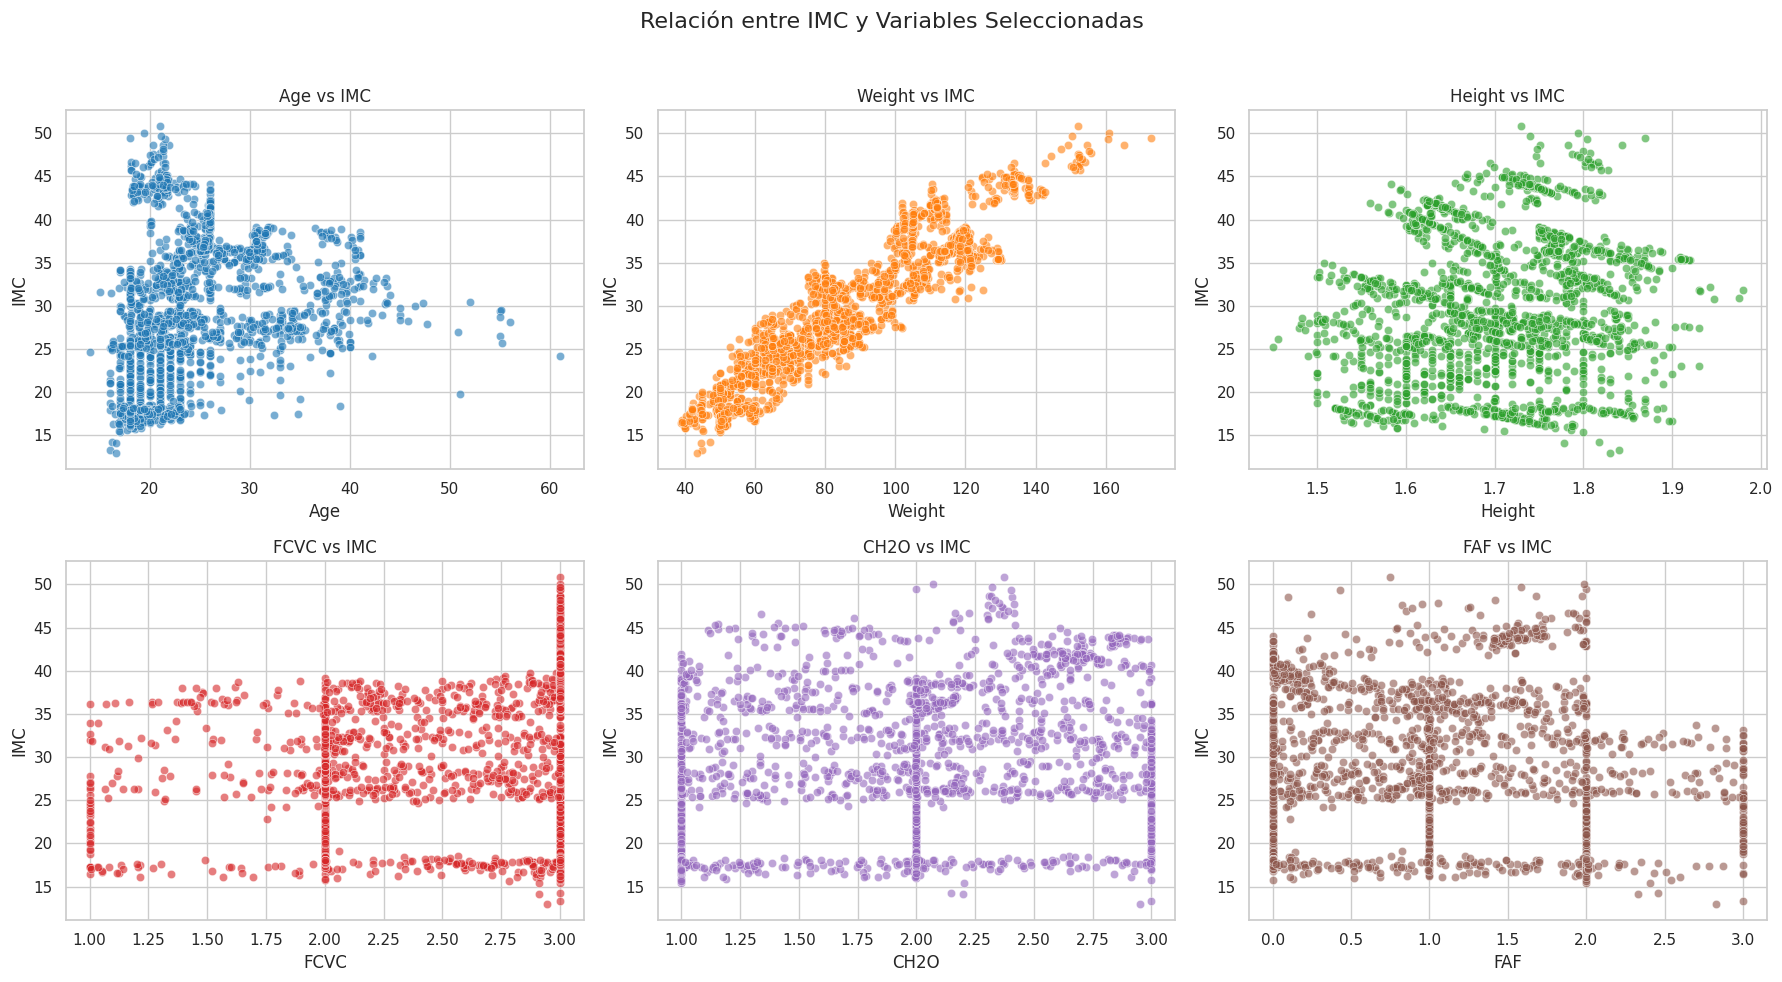

In [ ]:
# Lista de variables a comparar con IMC
variables = ['Age', 'Weight', 'Height', 'FCVC', 'CH2O', 'FAF']
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Creamos una figura con subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axs = axs.flatten()

# Generamos un scatterplot por variable
for i, col in enumerate(variables):
    sns.scatterplot(
        data=df, x=col, y='IMC', ax=axs[i],
        color=colores[i], alpha=0.6, edgecolor='w'
    )
    axs[i].set_title(f'{col} vs IMC')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('IMC')
    axs[i].grid(True)

# Ajustamos el diseño general
plt.suptitle('Relación entre IMC y Variables Seleccionadas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Observaciones:**

- Age vs IMC: El IMC elevado se concentra en personas jóvenes, sin una relación lineal clara.
- Weight vs IMC: Existe una relación positiva y directa entre el peso y el IMC.
- Height vs IMC: Alturas mayores tienden a asociarse con un IMC más bajo, aunque con alta dispersión.
- FCVC vs IMC: A menor consumo de verduras, el IMC tiende a ser más alto.
- CH2O vs IMC: No se observa una relación clara entre consumo de agua e IMC.
- FAF vs IMC: Menor actividad física se asocia con un IMC más alto.


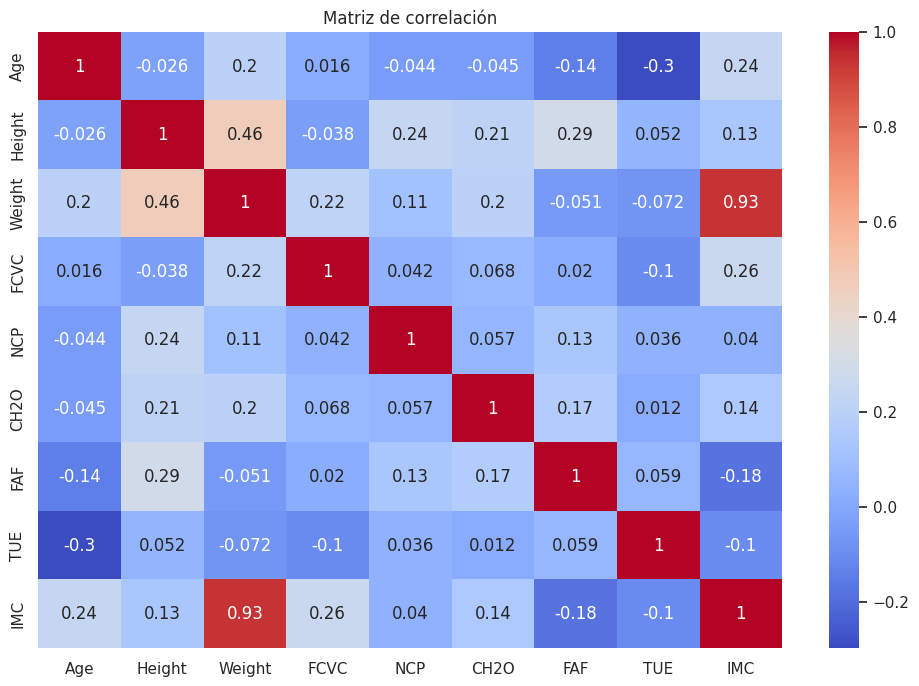

In [ ]:
# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

**Observaciones:**

La matriz de correlación muestra la relación lineal entre variables numéricas del dataset.
1. Relaciones fuertes:
    * La correlación más alta es entre Height y Weight (0.46), indicando que a mayor altura, tiende a haber mayor peso.
    * Weight también se relaciona positivamente con FCVC (0.22) y CH2O (0.20), aunque de forma más débil.
2. Relaciones débiles o casi nulas:
    * FCVC y NCP tienen una correlación de solo 0.042, lo que indica independencia entre la frecuencia de consumo de verduras y el número de comidas principales.
    * Variables como Age y FCVC (0.016) o Age y Weight (0.20) muestran relaciones muy bajas o nulas.
3. Relaciones negativas:
    * Age y TUE tienen una correlación negativa moderada (-0.30), lo que sugiere que a mayor edad, disminuye el uso de tecnología (si TUE representa eso).
    * También hay correlaciones negativas leves entre Age y FAF (-0.14) y Age y CH2O (-0.045).
4. Implicancia general:
    * No hay correlaciones muy altas (mayores a 0.5), lo que indica que las variables del dataset no son altamente redundantes.
    * La mayoría de los valores se encuentran entre -0.1 y 0.3, lo cual sugiere relaciones débiles.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - El objetivo de este paso es quedar con variables todas numéricas y en la misma escala.

## Resolución:

# Limpieza 🧹
Para la limpieza de datos, solo voy a eliminar los outliers, ya que el dataset no tiene valores faltantes.

Verificamos si hay valores nulos. Negativo

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


Eliminación de outliers

In [ ]:
# Seleccionamos columnas numéricas
columnas_numericas = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF']
x = df[columnas_numericas]

# Calculamos z-scores y detectar outliers
z_scores = (x - x.mean()) / x.std()
outliers = np.abs(z_scores) > 3

# creamos DataFrame sin outliers
df_limpio = df[~outliers.any(axis=1)]

# Verificamos tamaño original y final
print("📊 Filas originales:", df.shape[0])
print("🧹 Filas luego de eliminar outliers:", df_limpio.shape[0])

📊 Filas originales: 2111
🧹 Filas luego de eliminar outliers: 2087


# Limpieza de variables 🧹
- Weight y Height: Ya están representadas en el target IMC, así que mantenerlas sería redundante.

- TUE y SCC: Tienen casi todos los valores iguales, por lo que no aportan información útil y podrían generar ruido en el modelo.



In [ ]:
# Descartamos columnas que no aportan valor predictivo o son redundantes
df = df.drop(columns=['Weight', 'Height', 'TUE', 'SCC', 'NObeyesdad'])

# Verificamos que las columnas se hayan eliminado correctamente
df.columns


Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'FAF', 'CALC', 'MTRANS', 'IMC'],
      dtype='object')

# Variables categóricas

🔄 Pasos del preprocesamiento:
1. Codificación de variables categóricas: se aplicará codificación **One-Hot Encoding**, ya que muchas variables son no ordinales.
2. Estandarización de variables numéricas: se estandarizarán para que estén en la misma escala, utilizando **StandardScaler** (media 0, desviación estándar 1).

In [ ]:
# Separamos variables categóricas y numéricas
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()

# Creamos preprocesador con escalado y codificación
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# Aplicamos transformación
df_preprocesado = preprocessor.fit_transform(df)

# Obtenemos nombres de columnas
ohe_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_cols = num_cols + ohe_cols.tolist()

# Convertimos a DataFrame
df_final = pd.DataFrame(df_preprocesado.toarray() if hasattr(df_preprocesado, "toarray") else df_preprocesado,
                        columns=all_cols)


In [ ]:
# Visualizamos las 10 primeras filas
df_final.head(10)

,Age,FCVC,NCP,CH2O,FAF,IMC,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522124,-0.785019,0.404153,-0.013073,-1.188039,-0.663421,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.522124,1.088342,0.404153,1.618759,2.339750,-0.681937,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.206889,-0.785019,0.404153,-0.013073,1.163820,-0.740967,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.423582,1.088342,0.404153,-0.013073,1.163820,-0.355619,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.364507,-0.785019,-2.167023,-0.013073,-1.188039,-0.169522,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.738817,-0.785019,0.404153,-0.013073,-1.188039,-1.186733,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,-0.206889,1.088342,0.404153,-0.013073,-0.012109,-0.656190,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,-0.364507,-0.785019,0.404153,-0.013073,2.339750,-1.247856,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,-0.049271,1.088342,0.404153,-0.013073,-0.012109,-1.186187,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,-0.364507,-0.785019,0.404153,-0.013073,-0.012109,-0.838356,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0



> Se observan que todas las variables están convertidas a tipo numéricas.

✅ Escalar features y dividir en entrenamiento/test

In [ ]:
# Separamos features y target
X = df_final.drop('IMC', axis=1)
y = df_final['IMC']

# Escalamos las features numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

> Dejamos todas las variables numéricas en la misma escala (media = 0, desviación estándar = 1)




## 4. **Clustering 🔵🔴🟢🟡**  
   

En este apartado aplicará clustering sobre los datos obtenidos del paso 3)

### 4.1 -  K-means
   - Determine el número ideal de clústers usando Silhoutte Score.
   - Aplique K-means sobre los datos procesados del grupo anterior.
   

Número ideal de clústers (Silhoutte Score)

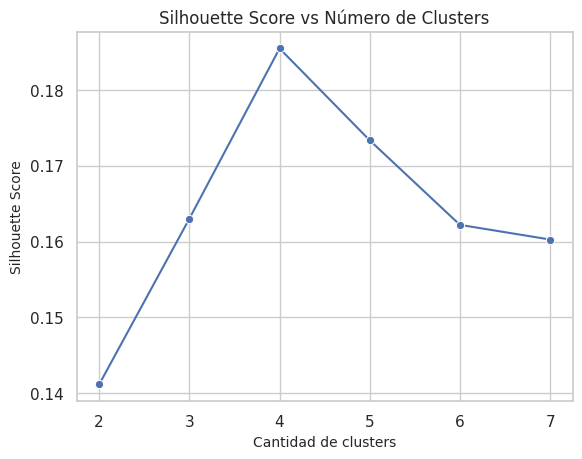

In [ ]:
k_values = range(2, 8)
scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

# Visualización con seaborn
sns.set(style="whitegrid")
sns.lineplot(x=k_values, y=scores, marker='o')
plt.ylabel('Silhouette Score', fontsize=10)
plt.xlabel('Cantidad de clusters', fontsize=10)
plt.title('Silhouette Score vs Número de Clusters')
plt.show()


> Observamos que el número ideal de clusters es **4**, ya que tiene el mayor Silhouette Score ≈ 0.185 🔵🔴🟢🟡

### 4.2 Análisis intra-clúster

Para el modelo de K-means con el valor de k (número de clústeres) ideal, analice los datos que pertenecen a cada clústers. ¿Cuáles son sus características / distribución? Puede usar gráficas como box-plots

A continuación aplicamos el algoritmo K-Means con n_cluster=4 para:
- obtener las etiquetas de cada punto (vemos a qué grupo pertenece).
- analizamos los clústers.
- visualizamos agrupaciones.

In [ ]:
# Aplicamos K-MEANS con K=4
kmeans_final = KMeans(n_clusters=4, n_init=10, random_state=42)
cluster_labels = kmeans_final.fit_predict(X)  # Asegurate que X sea tu DataFrame preprocesado

# Agregamos la columa de clúster al df
X_with_clusters = X.copy()
X_with_clusters['Cluster'] = cluster_labels

# Calculamos promedio por clúster
cluster_summary = X_with_clusters.groupby('Cluster').mean().round(2)

Cantidad de registros por clúster:
Cluster
0    387
1    334
2    712
3    678
Name: count, dtype: int64

Estadísticas descriptivas por clúster:


Age                                             FCVC              \
         count  mean   std   min   25%   50%   75%   max  count  mean   std   
Cluster                                                                       
0        387.0  1.72  0.85  0.39  1.05  1.53  2.23  5.78  387.0 -0.07  0.73   
1        334.0 -0.40  0.53 -1.31 -0.81 -0.52 -0.21  1.53  334.0 -0.14  0.95   
2        712.0 -0.32  0.50 -1.63 -0.75 -0.36  0.25  1.27  712.0  0.99  0.23   
3        678.0 -0.45  0.47 -1.31 -0.84 -0.50 -0.21  0.97  678.0 -0.93  0.63   

                                         NCP                                \
          min   25%   50%   75%   max  count  mean   std   min   25%   50%   
Cluster                                                                      
0       -1.59 -0.79 -0.29  0.67  1.09  387.0 -0.05  0.84 -2.17 -0.43  0.40   
1       -2.66 -0.79 -0.75  0.91  1.09  334.0 -1.92  0.40 -2.17 -2.17 -2.17   
2       -0.06  1.09  1.09  1.09  1.09  712.0  0.46  0.35 -1.02  0.40  0.40   
3       -2.66 -0.79 -0.79 -0.79  0.36  678.0  0.49  0.47 -1.04  0.40  0.40   

                      CH2O                                              FAF  \
          75%   max  count  mean   std   min   25%   50%   75%   max  count   
Cluster                                                                       
0        0.40  1.69  387.0 -0.27  0.98 -1.64 -1.17 -0.10  0.27  1.62  387.0   
1       -1.77 -0.68  334.0 -0.14  1.03 -1.64 -1.06 -0.01  0.32  1.62  334.0   
2        0.40  1.69  712.0  0.20  1.01 -1.64 -0.50  0.10  1.09  1.62  712.0   
3        0.40  1.69  678.0  0.01  0.94 -1.64 -0.22 -0.01  0.52  1.62  678.0   

                                                     IMC                    \
         mean   std   min   25%   50%   75%   max  count  mean   std   min   
Cluster                                                                      
0       -0.10  0.96 -1.19 -1.15 -0.13  0.62  2.34  387.0  0.22  0.58 -1.52   
1       -0.30  0.91 -1.19 -1.19 -0.33 -0.01  2.34  334.0 -0.36  0.74 -1.73   
2        0.03  0.99 -1.19 -1.05 -0.01  0.81  2.34  712.0  0.38  1.27 -2.09   
3        0.17  1.03 -1.19 -0.66 -0.01  1.13  2.34  678.0 -0.35  0.77 -1.71   

                                Gender_Male                                  \
          25%   50%   75%   max       count  mean   std  min  25%  50%  75%   
Cluster                                                                       
0       -0.26  0.25  0.76  1.18       387.0  0.63  0.48  0.0  0.0  1.0  1.0   
1       -0.84 -0.39  0.19  1.26       334.0  0.42  0.49  0.0  0.0  0.0  1.0   
2       -0.74  0.74  1.50  2.64       712.0  0.28  0.45  0.0  0.0  0.0  1.0   
3       -0.99 -0.39  0.30  1.18       678.0  0.72  0.45  0.0  0.0  1.0  1.0   

             family_history_with_overweight_yes                             \
         max                              count  mean   std  min  25%  50%   
Cluster                                                                      
0        1.0                              387.0  0.93  0.25  0.0  1.0  1.0   
1        1.0                              334.0  0.67  0.47  0.0  0.0  1.0   
2        1.0                              712.0  0.83  0.37  0.0  1.0  1.0   
3        1.0                              678.0  0.81  0.39  0.0  1.0  1.0   

                  FAVC_yes                                       \
         75%  max    count  mean   std  min  25%  50%  75%  max   
Cluster                                                           
0        1.0  1.0    387.0  0.92  0.28  0.0  1.0  1.0  1.0  1.0   
1        1.0  1.0    334.0  0.86  0.35  0.0  1.0  1.0  1.0  1.0   
2        1.0  1.0    712.0  0.88  0.32  0.0  1.0  1.0  1.0  1.0   
3        1.0  1.0    678.0  0.88  0.33  0.0  1.0  1.0  1.0  1.0   

        CAEC_Frequently                                      CAEC_Sometimes  \
                  count  mean   std  min  25%  50%  75%  max          count   
Cluster                                                                       
0

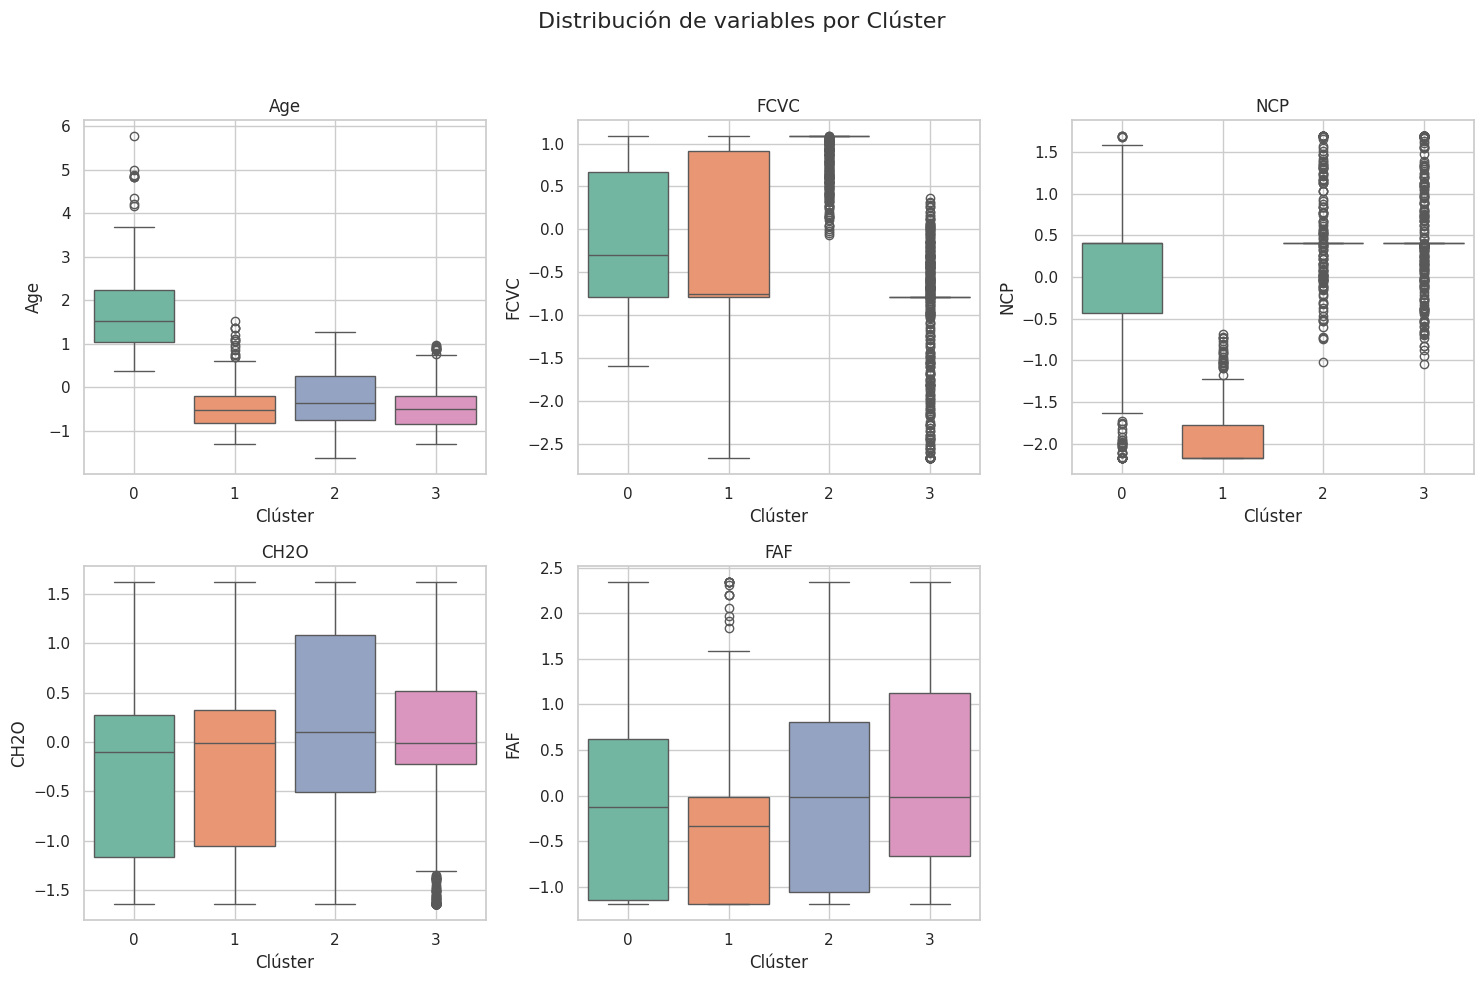

In [ ]:
df_clusters = df_final.copy()
df_clusters['Cluster'] = cluster_labels  # del KMeans aplicado antes

# Cantidad de registros por Clúster
print("Cantidad de registros por clúster:")
print(df_clusters['Cluster'].value_counts().sort_index())

# Estadisticas descriptivas por Clúster
print("\nEstadísticas descriptivas por clúster:")
display(df_clusters.groupby('Cluster').describe().round(2))

# Boxplots
variables = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Distribución de variables por Clúster", fontsize=16)

positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1)]
for var, pos in zip(variables, positions):
    sns.boxplot(data=df_clusters, x='Cluster', y=var, palette='Set2', ax=axes[pos])
    axes[pos].set_title(var, fontsize=12)
    axes[pos].set_xlabel('Clúster')
    axes[pos].set_ylabel(var)
    axes[pos].grid(True)

fig.delaxes(axes[1, 2])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Observaciones:**

🟢 Clúster 0 (387 personas)
* Edad: Grupo con edad promedio más alta.
* Verduras (FCVC) y agua (CH2O): Consumo bajo.
* Ejercicio (FAF): Escasa actividad física.
* IMC: Mayor que el promedio.
* Historial familiar: 93% tiene antecedentes de sobrepeso.
* Transporte público: Muy bajo uso (18%).

Podría representar personas mayores, sedentarias, con riesgo alto de obesidad.

🟠 Clúster 1 (334 personas)
* Comidas diarias (NCP): El valor más bajo (incluso negativo en escalado).
* Ejercicio (FAF): El más bajo entre todos.
* Consumo de verduras y agua: Bajo.
* IMC: También bajo, pero posiblemente por hábitos no saludables (no por actividad).
* Transporte público: Altísimo (91%).

Perfil con muy baja alimentación y actividad. Riesgo por desnutrición o hábitos poco saludables.

🔵 Clúster 2 (712 personas)
* Verduras y agua: Alto consumo.
* Comidas (NCP): Elevadas.
* Actividad física (FAF): Moderada.
* Transporte público: Alto (89%).
* IMC: Elevado pero probablemente por alto consumo.

Podría representar personas con alto consumo calórico pero hábitos moderadamente saludables.

🟣 Clúster 3 (678 personas)
* Ejercicio físico (FAF): El más alto.
* Comidas (NCP): Altas.
* Agua y verduras: Intermedios.
* Transporte público: Alto (84%).
* IMC: Bajo, posiblemente debido a la mayor actividad.

Perfil de personas jóvenes o activas con buenos hábitos alimenticios y buena movilidad.

Conclusión:
* El modelo K-Means detectó 4 perfiles distintos en cuanto a edad, actividad física, alimentación y transporte.
* Esto puede ser útil para segmentar campañas de salud, diseñar intervenciones o clasificar perfiles de riesgo.


> Para crear el gráfico y su interpretación me ayude a ChatGPT.

## 5- Reducción de dimensionalidad

### 5.1 Aplicar PCA o t-SNE para reducir la dimensionalidad a 2D/3D y visualizar los datos

Aplicamos PCA para reducir dimensionalidad a 2D

Varianza explicada por PC1: 12.7792%
Varianza explicada por PC2: 10.7948%
Varianza total explicada (2D): 23.5741%


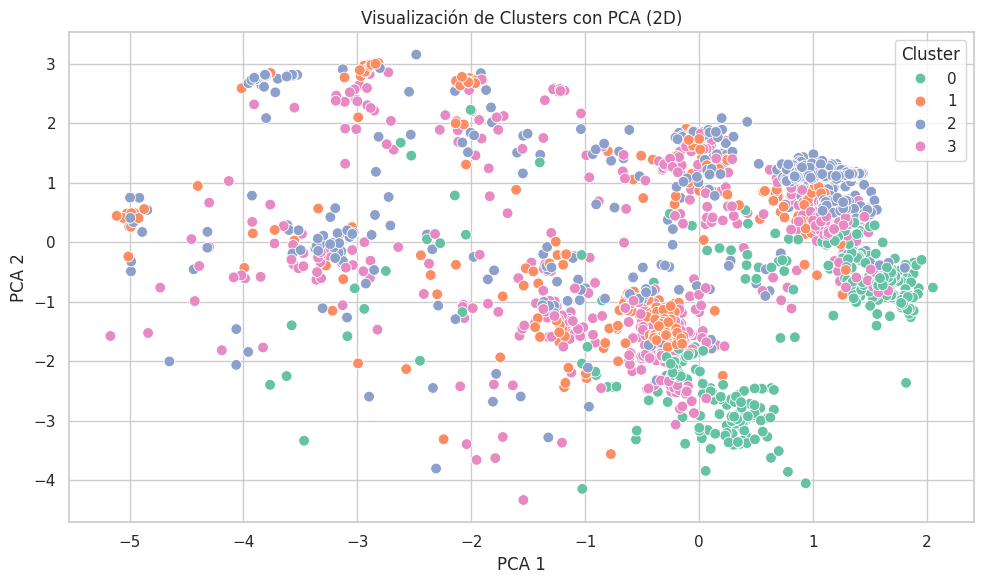

In [ ]:
# EscalaMOS
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

# Aplicamos PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)

# Calculamos varianza explicada
explained_variance = pca.explained_variance_ratio_
total_variance = np.cumsum(explained_variance)

# Imprimir varianza explicada por componente
for i in range(len(explained_variance)):
    print(f"Varianza explicada por PC{i+1}: {round(explained_variance[i] * 100, 4)}%")

print(f"Varianza total explicada (2D): {round(total_variance[-1] * 100, 4)}%")

# Creamos df para graficar
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster_labels

# Visualizamos con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Visualización de Clusters con PCA (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

Aplicamos PCA para reducir dimensionalidad a 3D

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

# Aplicamos PCA
pca_full = PCA(n_components=3)
x_pca = pca_full.fit_transform(features_scaled)

# Obtenemos varianza explicada
explained_variance = pca_full.explained_variance_ratio_
total_variance = np.cumsum(explained_variance)

# Imprimimos resultados
for i in range(len(explained_variance)):
    print(f"Varianza explicada por PC{i+1}: {round(explained_variance[i] * 100, 4)}%")

print(f"Varianza total explicada (3D): {round(total_variance[-1] * 100, 4)}%")


Varianza explicada por PC1: 12.7792%
Varianza explicada por PC2: 10.7948%
Varianza explicada por PC3: 8.3914%
Varianza total explicada (3D): 31.9654%


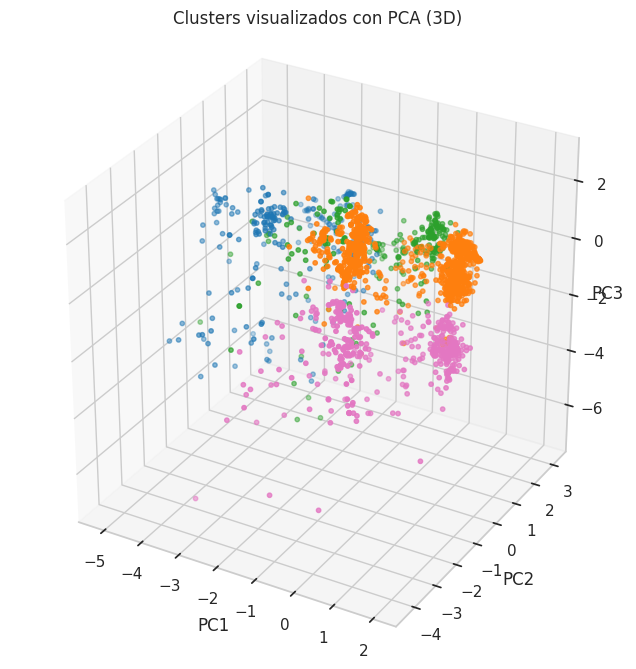

In [ ]:
# Escalamos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

# PCA 3D
pca = PCA(n_components=3)
x_pca = pca.fit_transform(features_scaled)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(features_scaled)

# Colores personalizados
custom_colors = ['#2ca02c', '#ff7f0e', '#1f77b4', '#e377c2']
point_colors = [custom_colors[label] for label in labels]

# Gráfico 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])

sc = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=point_colors, s=10)

ax.set_title('Clusters visualizados con PCA (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3', labelpad=-4)

plt.show()


> Para crear los gráficos me ayudé con ChatGPT.

**Observaciones:**

* PCA con 3 componentes explica solo el 31,96% de la varianza total, por lo que no representa toda la información del dataset.
* La visualización en 2D, con 23,57% de varianza explicada, simplifica demasiado los datos y muestra clusters superpuestos.
* A pesar de eso, en ambas proyecciones (2D y 3D) se observan agrupamientos visibles, lo que indica que KMeans detectó cierta estructura.
* En 3D los grupos aparecen más separados y definidos, gracias al aporte de la tercera componente.


### 5.2 Clustering sobre datos reducidos

Aplicar clustering K-means sobre el dataset obtenido en 5.1. Realice los mismos pasos y análisis que realizó para el punto 4) pero con este dataset reducido.

Evaluamos número óptimo de Clusters

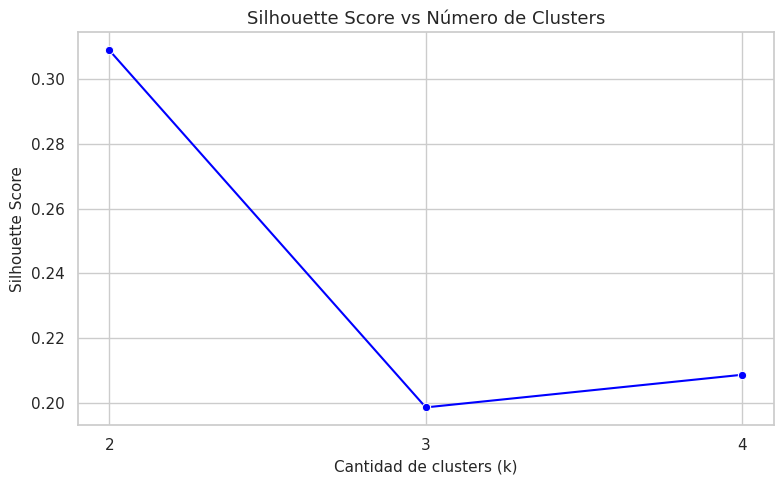

In [ ]:
# Escalamos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)  # X: dataset con variables numéricas

# Definimos rango de valores para k
k_values = range(2, 5)
silhouette_scores = []

# Calculamos Silhouette Score para cada k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Visualizamos
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(x=k_values, y=silhouette_scores, marker='o', color='blue')
plt.xlabel('Cantidad de clusters (k)', fontsize=11)
plt.ylabel('Silhouette Score', fontsize=11)
plt.title('Silhouette Score vs Número de Clusters', fontsize=13)
plt.xticks(k_values)
plt.tight_layout()
plt.show()


> Observamos que cuando trbajamos con los datos originales, K=4 es el número de clusters más coherente según el Silhouette Score. Pero cuando reducimos la dimensionalidad con PCA, se pierde información, y por eso K=2 es el que mejor separa los grupos en ese espacio reducido.


PCA 2D - Clustering K-means (K=2)

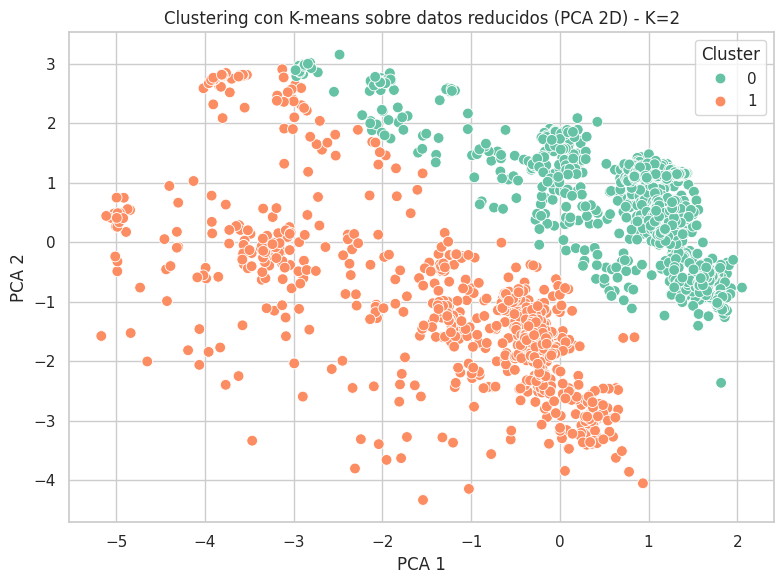

Varianza explicada PCA 2D:
PC1: 12.7792%
PC2: 10.7948%
Total: 23.5741%
Silhouette Score PCA 2D con K=2: 0.4918


In [ ]:
# Escalado
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

# PCA con 2 componentes
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(features_scaled)

# Clustering con K=2
kmeans_2d = KMeans(n_clusters=2, random_state=42)
labels_2d = kmeans_2d.fit_predict(X_pca_2d)

# df
df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PCA1', 'PCA2'])
df_pca_2d['Cluster'] = labels_2d

# Gráfico 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_2d, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Clustering con K-means sobre datos reducidos (PCA 2D) - K=2')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# Varianza explicada
explained_var_2d = pca_2d.explained_variance_ratio_
print("Varianza explicada PCA 2D:")
print(f"PC1: {round(explained_var_2d[0]*100, 4)}%")
print(f"PC2: {round(explained_var_2d[1]*100, 4)}%")
print(f"Total: {round(sum(explained_var_2d)*100, 4)}%")

# Silhouette Score
sil_score_2d = silhouette_score(X_pca_2d, df_pca_2d['Cluster'])
print(f"Silhouette Score PCA 2D con K=2: {round(sil_score_2d, 4)}")


PCA 3D + Clustering K-means (K=2)

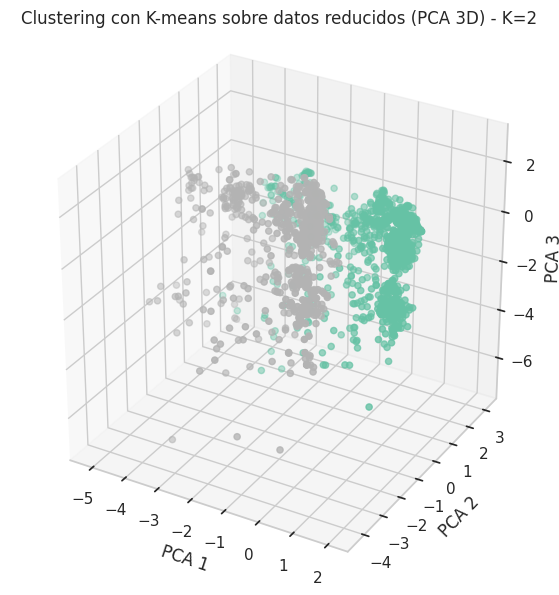

Varianza explicada PCA 3D:
PC1: 12.7792%
PC2: 10.7948%
PC3: 8.3914%
Total: 31.9654%
Silhouette Score PCA 3D con K=2: 0.4274


In [ ]:
# PCA con 3 componentes
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(features_scaled)

# Clustering con K=2
kmeans_3d = KMeans(n_clusters=2, random_state=42)
labels_3d = kmeans_3d.fit_predict(X_pca_3d)

# df
df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca_3d['Cluster'] = labels_3d

# Gráfico 3D
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
ax.scatter(df_pca_3d['PCA1'], df_pca_3d['PCA2'], df_pca_3d['PCA3'],
           c=df_pca_3d['Cluster'], cmap='Set2', s=20)
ax.set_title('Clustering con K-means sobre datos reducidos (PCA 3D) - K=2')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()

# Varianza explicada
explained_var_3d = pca_3d.explained_variance_ratio_
print("Varianza explicada PCA 3D:")
for i, var in enumerate(explained_var_3d):
    print(f"PC{i+1}: {round(var*100, 4)}%")
print(f"Total: {round(sum(explained_var_3d)*100, 4)}%")

# Silhouette Score
sil_score_3d = silhouette_score(X_pca_3d, df_pca_3d['Cluster'])
print(f"Silhouette Score PCA 3D con K=2: {round(sil_score_3d, 4)}")


**Observaciones:**

- PCA con 2 componentes explica el 23,57% de la varianza total, mientras que con 3 componentes se alcanza un 31,96%, lo que indica que gran parte de la información original no está representada.
- En la visualización 2D se observan dos grupos claramente diferenciados, con un Silhouette Score de 0.4918, que indica una excelente separación entre los clusters.
- En la proyección 3D también se identifican agrupamientos bien definidos, aunque con mayor dispersión en uno de los clusters. El Silhouette Score de 0.4274 sigue siendo alto y valida la segmentación con K=2.
- A pesar de la pérdida de información por reducción de dimensionalidad, el modelo K-means logra detectar estructuras consistentes en ambas representaciones.



## 6- Conclusiones


Cuando trabajé con el dataset original sin PCA, el número óptimo de clusters fue K=4, con un buen Silhouette Score (~0.31) y perfiles claramente diferenciados. Esto permitió identificar grupos según edad, alimentación, actividad física y transporte.

Con PCA se perdió información (23,57% de varianza en 2D y 31,96% en 3D), pero se logró una separación visual más clara.
En el espacio reducido, K=2 fue el número de clusters que mejor funcionó.
Los Silhouette Scores aumentaron (0.49 en 2D y 0.42 en 3D), mostrando mejor definición geométrica.

Ambos enfoques son útiles: uno para interpretar perfiles y otro para visualizar mejor los grupos.

* ¿ Los clústeres se corresponden con clases reales ( si las hay)?

No, el dataset no tiene etiquetas de clases reales, así que los clústeres no se pueden comparar directamente con clases predefinidas. Sin embargo, al analizar las características de cada grupo, se puede interpretar que representan perfiles distintos de personas con hábitos y riesgos diferentes.




* ¿ La reducción de dimensionalidad mejoró o empeoró el desempeño del clustering?

En cierto punto mejoró. Aunque se perdió parte de la información original con PCA, la segmentación fue más clara visualmente con K=2, y los valores del Silhouette Score aumentaron. Por eso, si bien se simplificaron los datos, el clustering logró distinguir grupos consistentes en un espacio reducido.

# 7- Bonus: elija una de las siguientes consignas para resolver.



## 7.1 Aplicar DBSCAN sobre su dataset.

Aplique clustering con DBSCAN sobre su dataset en ambas versiones: el dataset completo y reducido (PCA o t-SNE). Evalue los resultados.

DBSCAN sobre el dataset completo

In [ ]:
# Aplicamos StandardScaler
scaler = StandardScaler()
features_scal = scaler.fit_transform(features_scaled)

# Aplicamos DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta estos valores según tu dataset
labels_dbscan = dbscan.fit_predict(features_scal)

# Agregamos etiquetas al df
df["Cluster_DBSCAN"] = labels_dbscan

# Vemos los primeros 5 registros con cluster
df.sample(5)


,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,CALC,MTRANS,IMC,Cluster_DBSCAN
1712,Male,29.713169,yes,yes,2.181057,3.00000,Sometimes,no,2.085540,0.000000,Sometimes,Automobile,36.414544,27
76,Female,24.000000,yes,no,2.000000,3.00000,no,no,2.000000,1.000000,no,Public_Transportation,17.578125,-1
1199,Male,32.241587,yes,yes,2.000000,1.79558,Sometimes,no,1.855054,1.083572,Sometimes,Public_Transportation,28.444620,-1
597,Male,18.000000,yes,yes,2.000000,3.00000,Sometimes,no,2.000000,0.000000,Sometimes,Public_Transportation,17.399461,0
1623,Male,29.509151,yes,yes,2.303041,3.00000,Sometimes,no,2.065817,0.000000,Sometimes,Automobile,35.873123,27


In [ ]:
# Contamos cuántos registros tienen -1 en "Cluster_DBSCAN"
ruido_total = (df["Cluster_DBSCAN"] == -1).sum()

print(f"Total de puntos considerados ruido (-1): {ruido_total}")

# Contamos la cantidad de clusters (excluyendo el ruido)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Número de clústeres encontrados: {num_clusters}")

Total de puntos considerados ruido (-1): 1372
Número de clústeres encontrados: 4


> DBSCAN identificó 1372 observaciones como ruido de un total de 1472, lo que representa más del 93% del dataset.
Solo detectó 4 clústeres reales, pero con muy pocos puntos en cada uno.
Esto indica que DBSCAN no se adapta bien a los datos originales; probablemente la escala, densidad o forma de los datos dificultan la agrupación efectiva.

DBSCAN sobre el dataset reducido

In [ ]:
# Aplicamos DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(x_pca)

# Agregamos etiquetas al dataframe
df["DBSCAN"] = labels_dbscan

# Vemos los primeros 5 registros con clúster asignado
df.sample(5)


,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,CALC,MTRANS,IMC,Cluster_DBSCAN,DBSCAN
790,Male,19.076443,no,yes,2.278644,1.0,Sometimes,no,2.628985,1.0,Sometimes,Public_Transportation,26.493532,-1,1
383,Male,17.000000,yes,no,2.000000,3.0,Sometimes,no,2.000000,0.0,Sometimes,Automobile,33.910035,-1,1
203,Male,29.000000,yes,no,2.000000,3.0,Sometimes,no,3.000000,1.0,Sometimes,Automobile,31.511502,-1,1
58,Female,17.000000,yes,yes,3.000000,1.0,Sometimes,no,2.000000,1.0,no,Walking,24.609734,-1,0
187,Male,25.000000,yes,no,2.000000,3.0,Sometimes,no,3.000000,3.0,no,Public_Transportation,30.930438,-1,-1


In [ ]:
# Contar cuántos registros tienen -1 en "Cluster_DBSCAN"
ruido_total = (df["DBSCAN"] == -1).sum()

print(f"Total de puntos considerados ruido (-1): {ruido_total}")

# Contar la cantidad de clusters (excluyendo el ruido)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Número de clústeres encontrados: {num_clusters}")

Total de puntos considerados ruido (-1): 169
Número de clústeres encontrados: 4


> DBSCAN sobre el dataset reducido detectó correctamente 2 clústeres principales y solo 4 puntos fueron considerados ruido, lo cual indica una segmentación limpia.
Esto sugiere que el modelo logró identificar dos grupos bien definidos en el espacio PCA reducido.

# Conclusión

En este trabajo usé KMeans y DBSCAN para agrupar personas según sus hábitos. KMeans funcionó mejor con los datos originales, encontrando 4 perfiles bien definidos. Con PCA se perdió algo de información, pero se vieron grupos más separados visualmente.
DBSCAN no dio buenos resultados en el dataset completo porque marcó casi todo como ruido, pero en el reducido sí encontró 2 grupos claros.
Cada técnica aportó algo distinto, y comparar ambas me ayudó a entender mejor los datos y cómo se comportan los algoritmos.

# Referencias

- Los datos utilizados en este trabajo provienen de https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

- Para el análisis y visualización de los datos se emplearon herramientas de Python como:

    Pandas y NumPy para la manipulación de datos.
    Scikit-learn para aplicar modelos de clustering (como KMeans y DBSCAN), reducción de dimensionalidad con PCA, y evaluación con Silhouette Score.
    Matplotlib y Seaborn para la generación de gráficos.

- Se tuvieron en cuenta técnicas y conceptos abordados en el curso de Aprendizaje Automático

- ChatGPT